In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
from imblearn.over_sampling import SMOTE, RandomOverSampler


In [556]:
df = pd.read_csv(r'C:\Users\ss938719\Desktop\weatherAUS.csv')

In [557]:
#understanding the data set
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [558]:
#Number of rows and features
df.shape

(142193, 24)

In [559]:
#The dataset consists of 24 columns with both numeric and categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [560]:
#To check if there are any duplicate values in rows of the data set
df.duplicated().any()

False

In [561]:
#To result the number of rows which has duplicate values
df.duplicated().sum()


0

In [562]:

mapping = {'Yes': 1, 'No': 0}

# Convert the categorical features to numeric values
df['RainToday'] = df['RainToday'].map(mapping)
df['RainTomorrow'] = df['RainTomorrow'].map(mapping)


In [563]:
#Checking if the data set has any missing values
#This method returns TRUE when there is a missing value and FALSE when there is no missing value.
df.isna()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
142189,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
142190,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
142191,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False


In [564]:
#This command gives an integer value of all the missing values in each column
df.isna().sum()


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [565]:
import pandas as pd

#imputing mode value for NAN values

features_to_impute = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                      'Temp9am', 'Temp3pm', 'RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

for feature_name in features_to_impute:
    mode_value = df[feature_name].mode()[0] 
    df[feature_name].fillna(mode_value, inplace=True)


In [566]:
df.isna().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [567]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.174813,23.219477,2.326738,4.840901,3.988338,39.659350,13.954569,18.533303,69.220039,51.495742,1017.530193,1015.281978,5.404274,5.505707,16.987588,21.654889,0.221213,2.360682,0.224181
std,6.391258,7.111209,8.426426,3.250510,4.688665,13.195878,8.864344,8.754566,19.225704,20.532227,6.756591,6.682175,2.594776,2.434727,6.472166,6.874665,0.415065,8.477969,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.000000,0.200000,37.000000,13.000000,17.000000,70.000000,52.000000,1016.700000,1015.500000,7.000000,7.000000,16.800000,20.900000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,84.000000,65.000000,1021.800000,1019.400000,7.000000,7.000000,21.500000,26.300000,0.000000,0.800000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000


In [568]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#converting categerical features into numeric

categorical_features = ['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']  # Add more feature names as needed

# Using LabelEncoder
label_encoder = LabelEncoder()
for feature_name in categorical_features:
    df[feature_name] = label_encoder.fit_transform(df[feature_name])



In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  int32  
 1   Location       142193 non-null  int32  
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  int32  
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  int32  
 10  WindDir3pm     142193 non-null  int32  
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

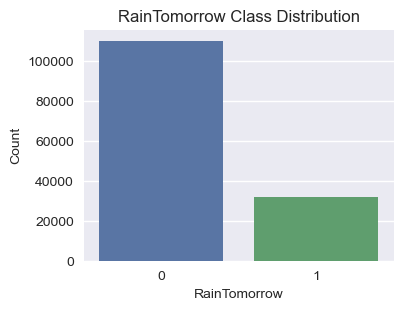

In [570]:
import matplotlib.pyplot as plt
import seaborn as sns


rain_tomorrow_counts = df['RainTomorrow'].value_counts()

# Create a bar plot for the feature
plt.figure(figsize=(4, 3))
sns.countplot(x='RainTomorrow', data=df)
plt.title('RainTomorrow Class Distribution')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()


In [571]:
from sklearn.preprocessing import MinMaxScaler

#Scaling the feastures
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)


In [572]:
from imblearn.over_sampling import SMOTE

#Using SMOTE to oversample the data

X = df_normalized.drop('RainTomorrow', axis=1)
y = df_normalized['RainTomorrow']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)


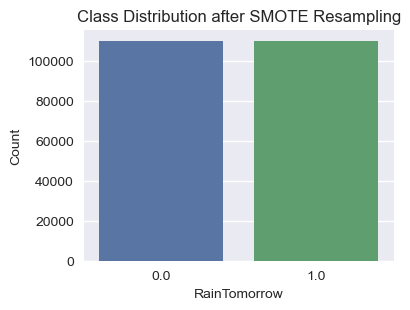

In [573]:
import matplotlib.pyplot as plt
import seaborn as sns

#Checking the oversampling on target feature
original_counts = df_normalized['RainTomorrow'].value_counts()

resampled_counts = y_resampled.value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=resampled_counts.index, y=resampled_counts.values)
plt.title('Class Distribution after SMOTE Resampling')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()


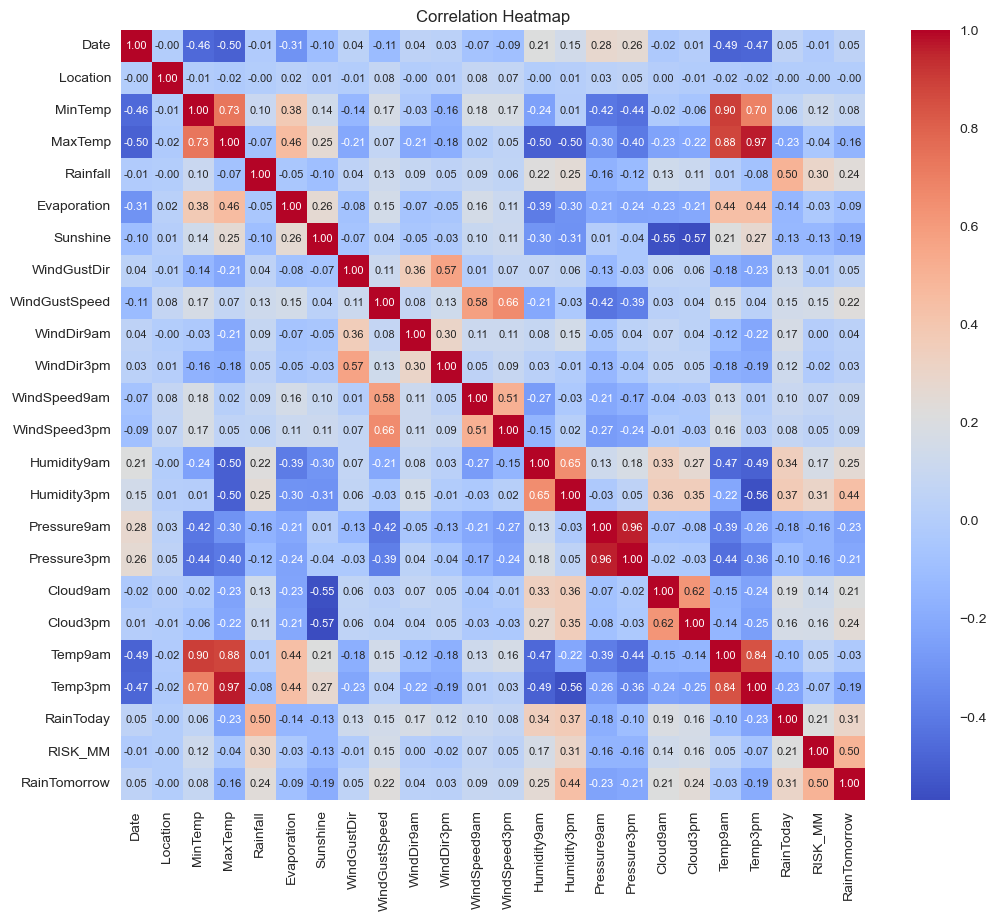

In [574]:
import matplotlib.pyplot as plt
import seaborn as sns


# correlation matrix
correlation_matrix = df_normalized.corr()

#  heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()


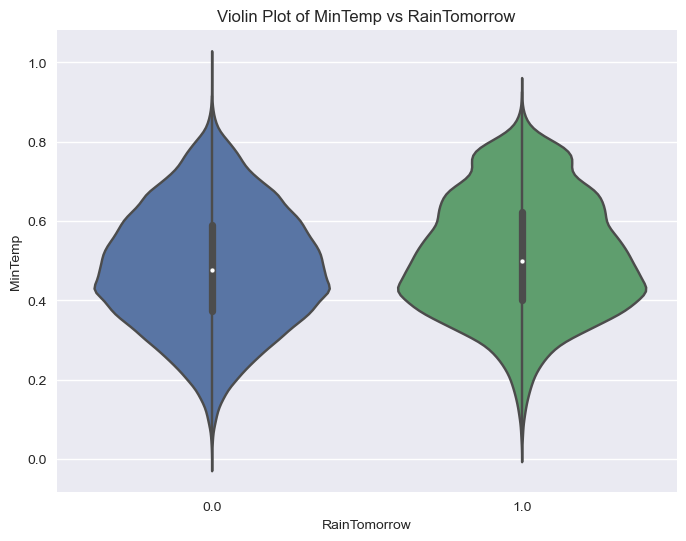

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt

#  violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_normalized, x='RainTomorrow', y='MinTemp')
plt.title('Violin Plot of MinTemp vs RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('MinTemp')
plt.show()


[0.0184714  0.01740872 0.02009237 0.01820663 0.0252348  0.01260221
 0.04574487 0.01885693 0.03204746 0.01970949 0.01931677 0.01640003
 0.01726145 0.03494115 0.11852537 0.03002064 0.03029915 0.02871201
 0.04512185 0.01692091 0.02164461 0.05671487 0.3357463 ]


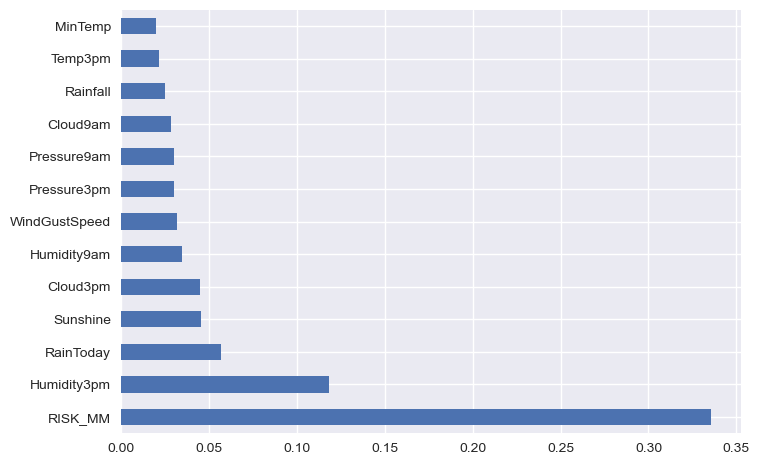

In [576]:
# perform feature selection using Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_resampled, y_resampled)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X_resampled.columns)
feat_importances.nlargest(13).plot.barh()
plt.show()

In [577]:
X = df[['Temp3pm','WindDir9am','Rainfall','Pressure3pm','WindGustSpeed','Humidity3pm','Pressure9am','Cloud9am',
      'Cloud3pm','Sunshine','RISK_MM','Humidity9am','RainToday']]
y = df[['RainTomorrow']]

In [578]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Temp3pm        142193 non-null  float64
 1   WindDir9am     142193 non-null  int32  
 2   Rainfall       142193 non-null  float64
 3   Pressure3pm    142193 non-null  float64
 4   WindGustSpeed  142193 non-null  float64
 5   Humidity3pm    142193 non-null  float64
 6   Pressure9am    142193 non-null  float64
 7   Cloud9am       142193 non-null  float64
 8   Cloud3pm       142193 non-null  float64
 9   Sunshine       142193 non-null  float64
 10  RISK_MM        142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  RainToday      142193 non-null  int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 13.6 MB


In [579]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# KNN

In [581]:
#Using hyperparameters to train using the dataset
knn1 = KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto')

knn1.fit(X_train, y_train)
y_pred_knn = knn1.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)


Accuracy: 0.8999964837019586


In [582]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     22098
           1       0.91      0.61      0.73      6341

    accuracy                           0.90     28439
   macro avg       0.90      0.80      0.84     28439
weighted avg       0.90      0.90      0.89     28439



In [583]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[21704   394]
 [ 2450  3891]]


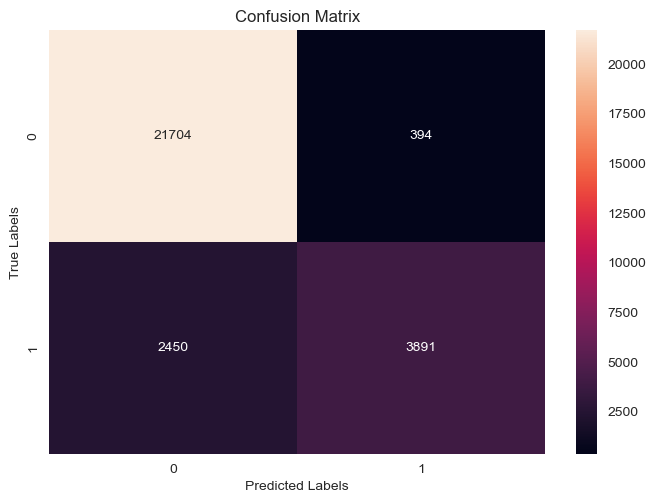

In [584]:
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Naive Bayes

In [585]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


# Create the Naive Bayes classifier
nb_classifier = GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-7)
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("Confusion Matrix:")
cmN = confusion_matrix(y_test, y_pred_nb)
print(cmN)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     22098
           1       0.75      1.00      0.86      6341

    accuracy                           0.93     28439
   macro avg       0.88      0.95      0.90     28439
weighted avg       0.94      0.93      0.93     28439

Confusion Matrix:
[[19990  2108]
 [    3  6338]]


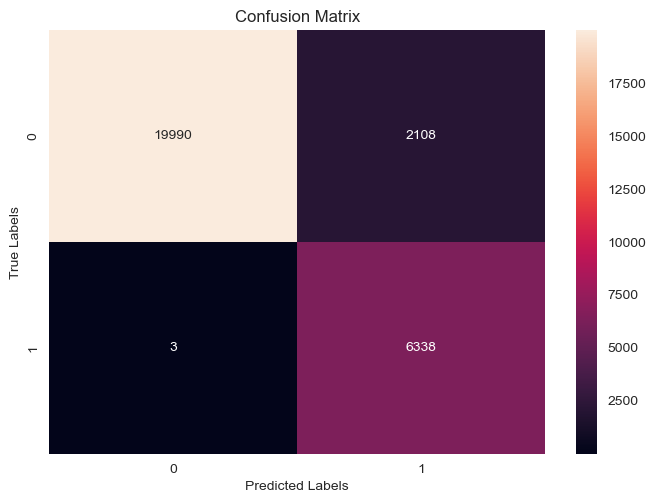

In [586]:
sns.heatmap(cmN, annot=True, fmt='d')

#Heatmap of confusion matrix
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [587]:
# predict probabilities
pred_prob1 = knn1.predict_proba(X_test)
pred_prob2 = nb_classifier.predict_proba(X_test)

In [588]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [589]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9334578785396173 0.9978123035794061


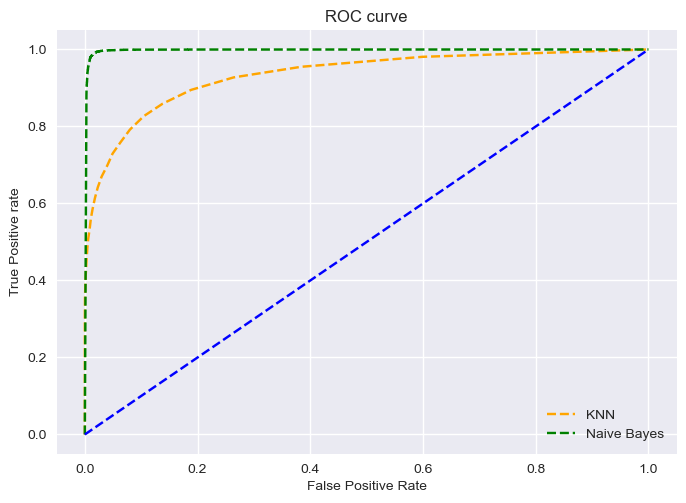

In [590]:

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();